In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Generate random data
center_1 = [1, 1]
center_2 = [5, 4]
center_3 = [9, 1]

data_1 = np.random.randn(50, 2) + center_1
data_2 = np.random.randn(50, 2) + center_2
data_3 = np.random.randn(50, 2) + center_3

data = np.concatenate((data_1, data_2, data_3), axis = 0)
data = data.tolist()

print(len(data))

150


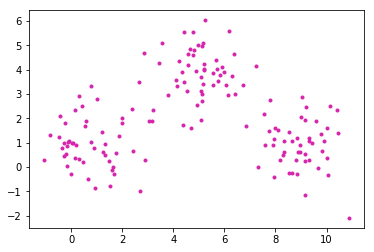

In [2]:
#Plot data
data_x = [x[0] for x in data]
data_y = [x[1] for x in data]

plt.plot(data_x, data_y, '.', color="#d624ac")
plt.show()

In [3]:
#Number of clusters
k = 3

#Number of data
n = len(data)

#Number of features
c = len(data[0])

print("Number of clusters: ", k)
print("Number of data: ", n)
print("Number of fatures: ", c)


Number of clusters:  3
Number of data:  150
Number of fatures:  2


In [4]:
centroid_list = []

while len(centroid_list) < k:
    #Pick a random element from data
    random_centroid = random.choice(data)
    
    if random_centroid not in centroid_list:
        centroid_list.append(random_centroid)
        
print("Centroids: ", centroid_list)

Centroids:  [[9.314895602100732, 1.2076711763449033], [-0.1445380806334462, 0.05823155774884248], [4.576622579083016, 4.628923821645476]]


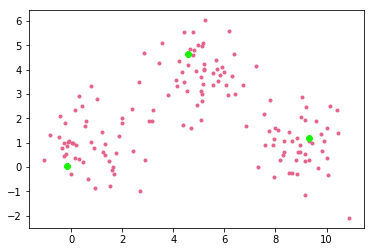

In [5]:
#Plot data
centroid_x = [x[0] for x in centroid_list]
centroid_y = [x[1] for x in centroid_list]

plt.plot(data_x, data_y, '.', color="#e56289")
plt.plot(centroid_x, centroid_y, '8', color="#1cf204")
plt.show()

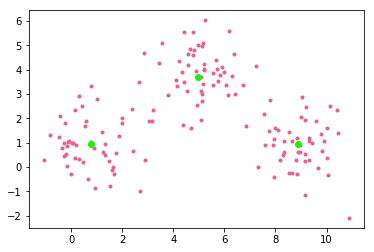

In [6]:
#data[0] y centroid_list[0]
data_labels = [0] * len(data)

error_distance = 1
while error_distance != 0:
    #Iterate all data
    for index_data in range(n):
        min_distance = 0

        #Iterate all centroids (index_centroids)
        for index_centroid in range(k):
            distance = 0

            #Iterate all features (index_features)
            for index_feature in range(c):
                distance += (data[index_data][index_feature] - centroid_list[index_centroid][index_feature])**2.0
            distance = distance ** 0.5

            #Assign the nearest centroid (computing distance to it)
            if distance < min_distance or min_distance==0:
                data_labels[index_data] = index_centroid
                min_distance = distance

    error_distance = 0
    for index_centroid in range(k):
        for index_feature in range(c):
            data_centroid_feature = [point_coordinate[index_feature] for point_coordinate, label in zip(data, data_labels) if label == index_centroid]
            feature_mean = sum(data_centroid_feature) / len(data_centroid_feature)
            error_distance += (centroid_list[index_centroid][index_feature] - feature_mean) ** 2
            centroid_list[index_centroid][index_feature] = feature_mean

    error_distance = error_distance ** 0.5

centroid_x = [x[0] for x in centroid_list]
centroid_y = [x[1] for x in centroid_list]

plt.plot(data_x, data_y, '.', color="#e56289")
plt.plot(centroid_x, centroid_y, '8', color="#1cf204")
plt.show()